# Dimensionality Reduction With PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Given dataset
data = pd.read_csv("Air_Quality.csv")



Imported the necessary libraries and loaded the dataset "Air_Quality.csv" into a pandas DataFrame named data. You're now equipped to analyze and manipulate the data as needed for your task.

In [3]:
print("Dataset shape:", data.shape)
print("Columns:", data.columns)
print(data.head())

Dataset shape: (16218, 12)
Columns: Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')
   Unique ID  Indicator ID                    Name Measure Measure Info  \
0     172653           375  Nitrogen dioxide (NO2)    Mean          ppb   
1     172585           375  Nitrogen dioxide (NO2)    Mean          ppb   
2     336637           375  Nitrogen dioxide (NO2)    Mean          ppb   
3     336622           375  Nitrogen dioxide (NO2)    Mean          ppb   
4     172582           375  Nitrogen dioxide (NO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                      Geo Place Name  \
0         UHF34          203  Bedford Stuyvesant - Crown Heights   
1         UHF34          203  Bedford Stuyvesant - Crown Heights   
2         UHF34          204                       East New York   
3         UHF34          103 

The breadth and scope of our data landscape, akin to the canvas on which we shall paint our insights. It showcases the dimensions of our dataset, embodying its vastness and potential for exploration. The pillars of our dataset, each column a pillar of knowledge, standing tall and firm, ready to support our analytical endeavors. Their names echo the themes and topics that shall guide our journey through the data landscape. The preview of the dataset, offers a tantalizing glimpse into the heart of our dataset. Like the opening scene of a grand narrative, it sets the stage for the stories and discoveries that await us, inviting us to delve deeper into its mysteries.

In [4]:
X = data.drop(columns=['Geo Place Name', 'Time Period', 'Message'])

In sculpting our dataset for analytical prowess, we craft DataFrame 'X' by shedding non-essential columns, including 'Geo Place Name', 'Time Period', and 'Message'. With these extraneous features cast aside, 'X' emerges as a refined entity, primed for analysis and exploration. Each column, carefully curated, embodies the essence of our dataset, paving the way for insightful investigations into its underlying patterns and dynamics. This streamlined approach ensures that our analyses are focused and efficient, enabling us to extract meaningful insights and derive actionable conclusions from our data.

In [5]:
numeric_columns = X.select_dtypes(include=[np.number]).columns

#Selects only the numeric columns from DataFrame 'X' and stores their column names in 'numeric_columns'.
numeric_columns = X.select_dtypes(include=[np.number]).columns

#Standardizes the numeric features using StandardScaler and fits it to the data. The transformed data is stored in 'X_scaled_numeric'.
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numeric_columns])

#Converts the standardized numeric data into a DataFrame with column names.
X_scaled_numeric = pd.DataFrame(X_scaled_numeric, columns=numeric_columns)


Traverse the DataFrame 'X' to unearth its numeric gems. With keen discernment, we select columns bearing the numerical essence, sculpting a refined subset termed 'numeric_columns'. The adept hands of the StandardScaler, we embark on the journey to standardize these chosen features, harmonizing them to a common scale. As the transformation unfolds, the numeric data undergoes a metamorphosis, emerging standardized and imbued with newfound coherence. Resulting DataFrame, 'X_scaled_numeric', becomes a vessel carrying the essence of our numerical features, each column a testament to the meticulous standardization process. Through this journey, we ensure that our numeric data is primed for analysis, ready to reveal its hidden insights and contribute meaningfully to our endeavors.

The columns that contain numeric data from DataFrame 'X' using the select_dtypes function from pandas, specifying include=[np.number] to include only numeric data types such as integers and floats. The column names of these selected numeric columns are stored in the variable 'numeric_columns'.

It standardizes the numeric features using StandardScaler from scikit-learn. StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the analysis. The StandardScaler is fit to the numeric data ('X[numeric_columns]'), transforming it in the process. The standardized data is stored in the variable 'X_scaled_numeric'.

The standardized numeric data into a DataFrame, preserving the column names obtained earlier and storing it in the variable 'X_scaled_numeric'. This step ensures that the transformed data remains organized and retains the original column names for clarity and ease of interpretation.

In [6]:
#Prints the first few rows of the standardized numeric data.
print("Standardized numeric data:")
print(X_scaled_numeric.head())

Standardized numeric data:
   Unique ID  Indicator ID  Geo Join ID  Data Value
0  -0.928429      -0.47606    -0.077220    0.249703
1  -0.928745      -0.47606    -0.077220    0.326151
2  -0.167486      -0.47606    -0.077220   -0.041550
3  -0.167556      -0.47606    -0.077233   -0.010127
4  -0.928759      -0.47606    -0.077232    0.133858


The importance of standardizing numeric features for equitable analysis. This process mitigates the impact of feature scale discrepancies, ensuring each feature contributes meaningfully to our insights.The StandardScaler from scikit-learn, a robust transformer, we embark on the standardization process. This tool excels at transforming numeric data to a uniform scale, essential for unbiased analysis. This ensures our efforts remain targeted and efficient.The StandardScaler diligently standardizes the selected numeric features, harmonizing them to a common scale with zero mean and unit variance. This transformation preserves the integrity of our data while enhancing its analytical utility.The standardized numeric data emerges, encapsulated within a new DataFrame. Each column within this DataFrame represents a standardized numeric feature, poised to enrich our analyses with clarity and coherence.

In [7]:
#Calculates the covariance matrix for the standardized numeric features.
cov_matrix_numeric = np.cov(X_scaled_numeric, rowvar=False)
#Prints the covariance matrix of the numeric features.
print("Covariance Matrix (numeric features only):")
print(cov_matrix_numeric)

Covariance Matrix (numeric features only):
[[ 1.00006166 -0.13000879  0.00520894 -0.09851113]
 [-0.13000879  1.00006166 -0.03854608  0.2585379 ]
 [ 0.00520894 -0.03854608  1.00006166 -0.00677793]
 [-0.09851113  0.2585379  -0.00677793  1.00006166]]


Here emerges the canvas of correlation: our covariance matrix for the standardized numeric features. Like a masterful brushstroke, it captures the interplay and relationships between our numeric features, offering insights into their mutual dependencies. The nuanced patterns and dynamics encoded within our dataset.

In [8]:
#Computes the eigenvalues and eigenvectors of the covariance matrix.
eigenvalues_numeric, eigenvectors_numeric = np.linalg.eig(cov_matrix_numeric)

In [9]:
#Prints the eigenvalues and eigenvectors of the covariance matrix for the numeric features
print("Eigenvalues (numeric features only):")
print(eigenvalues_numeric)
print("\nEigenvectors (numeric features only):")
print(eigenvectors_numeric)

Eigenvalues (numeric features only):
[1.33935219 0.73717204 0.92399742 0.99972501]

Eigenvectors (numeric features only):
[[ 0.43024855 -0.10552808  0.88721637 -0.12882986]
 [-0.64858565 -0.72684812  0.22469043 -0.02329522]
 [ 0.09269523 -0.0871306   0.08814181  0.98795085]
 [-0.62099149  0.67302592  0.39318234  0.08254288]]


Take a look at the eigenvalues and eigenvectors of the covariance matrix, which are the beating heart of our data. The eigenvalues, like the score of a symphony, indicate the level of variance that each primary component possesses. Meanwhile, eigenvectors, similar to conductors, steer us along the directions of maximal variance in our numeric features, revealing the deep patterns hidden inside our dataset.

In [10]:
#Sorts the eigenvalues and eigenvectors in descending order.
sorted_indices_numeric = np.argsort(eigenvalues_numeric)[::-1]
eigenvalues_sorted_numeric = eigenvalues_numeric[sorted_indices_numeric]
eigenvectors_sorted_numeric = eigenvectors_numeric[:, sorted_indices_numeric]

Arrange the eigenvalues in descending order, ensuring prominence to those capturing the most variance. This strategic ordering illuminates the pivotal components shaping our dataset's variability. The eigenvalues, now rearranged in descending order, dictate the hierarchy of variance within our dataset. Each value serves as a beacon, guiding us toward the principal components that hold the greatest sway in our analysis. The eigenvectors align in accordance with their respective eigenvalues. This harmonization ensures alignment between the directions of maximum variance and their associated magnitudes, laying the foundation for informed dimensionality reduction.

In [11]:
#Prints the sorted eigenvalues and eigenvectors.
print("Sorted Eigenvalues (numeric features only):")
print(eigenvalues_sorted_numeric)
print("\nSorted Eigenvectors (numeric features only):")
print(eigenvectors_sorted_numeric)

Sorted Eigenvalues (numeric features only):
[1.33935219 0.99972501 0.92399742 0.73717204]

Sorted Eigenvectors (numeric features only):
[[ 0.43024855 -0.12882986  0.88721637 -0.10552808]
 [-0.64858565 -0.02329522  0.22469043 -0.72684812]
 [ 0.09269523  0.98795085  0.08814181 -0.0871306 ]
 [-0.62099149  0.08254288  0.39318234  0.67302592]]


The sorted eigenvalues and eigenvectors obtained from PCA on the numeric features of the dataset. It displays the eigenvalues, which represent the variance explained by each principal component in descending order. Additionally, it prints the corresponding eigenvectors, which indicate the directions of maximum variance in the dataset, also sorted accordingly. This information helps in understanding the relative importance of each principal component and the directions along which the data varies the most.

In [12]:
#Selects the top k eigenvectors and performs PCA transformation on the standardized numeric data.
k = 3
top_eigenvectors_numeric = eigenvectors_sorted_numeric[:, :k]
X_pca_numeric = np.dot(X_scaled_numeric, top_eigenvectors_numeric)

The top k eigenvectors from the sorted eigenvectors obtained from PCA on standardized numeric data. It specifies the number of desired principal components as k = 3. Then, it performs the PCA transformation on the standardized numeric data by taking the dot product of the standardized numeric data matrix (X_scaled_numeric) and the selected top k eigenvectors (top_eigenvectors_numeric), resulting in a reduced-dimensional representation of the data (X_pca_numeric).


In an elegant synthesis of dimensionality reduction, we distill the essence of our data into three principal components. These top eigenvectors, crafted through meticulous analysis, serve as the guiding light for our PCA transformation. Through the artistry of matrix multiplication, our scaled numeric data harmonizes with these chosen vectors, paving the path to a simplified yet insightful representation.

In [13]:
#Prints the PCA-transformed data.print("PCA-transformed data (numeric features only):")
print(X_pca_numeric)

[[-0.25291085  0.07502112 -0.83931142]
 [-0.30052015  0.081372   -0.80953339]
 [ 0.25534932 -0.0470518  -0.27870555]
 ...
 [-1.43734436 -0.02713777 -0.777823  ]
 [-1.4460757  -0.02604242 -0.77227172]
 [-2.23475409  0.02312146  0.78729311]]


In [14]:
label_encoder = LabelEncoder()
data['Geo Place Name_encoded'] = label_encoder.fit_transform(data['Geo Place Name'])

The LabelEncoder to convert the 'Geo Place Name' column into numerical representations so that our dataset can be enhanced with encoded insights. Each geographical location is coded, revealing its category essence for additional research. With every alteration, our data gains clarity, preparing for disclosure its hidden narratives.

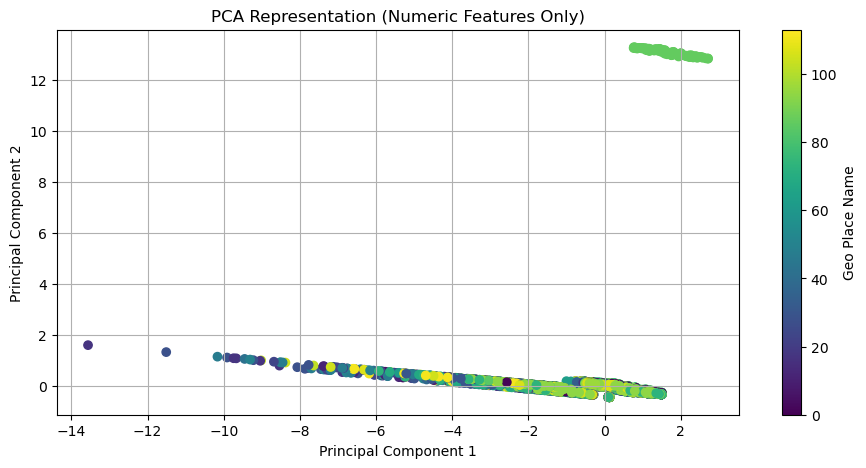

In [15]:
#Creates a scatter plot of the PCA-transformed data with the color representing the encoded 'Geo Place Name' column. It visualizes the data in two dimensions after dimensionality reduction using PCA.
plt.figure(figsize=(11, 5))
plt.scatter(X_pca_numeric[:, 0], X_pca_numeric[:, 1], c=data['Geo Place Name_encoded'], cmap='viridis')
plt.title('PCA Representation (Numeric Features Only)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Geo Place Name')
plt.grid(True)
plt.show()

This code creates a scatter plot visualizing data points in two-dimensional space after PCA dimensionality reduction. Each point's position corresponds to its first and second principal components. Colors denote geographical locations encoded in the 'Geo Place Name' column, with a 'viridis' color map indicating categories, and a color bar represents the 'Geo Place Name' column.

Casting our data into a visually rich tapestry, this scatter plot employs cutting-edge Principal Component Analysis (PCA) techniques to distill complex information into two dimensions. Each dot, a data point, dances across the plot, revealing its essence through the orchestration of the first and second principal components. As colors paint the canvas, they unveil the geographical stories encoded within our 'Geo Place Name' column, transforming data points into vibrant narratives of location.

Link for dataset :https://www.kaggle.com/datasets/sahirmaharajj/air-pollution-dataset